<a href="https://colab.research.google.com/github/Leoli04/llms-notebooks/blob/main/d2l/01_d2l_preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 预备知识

机器学习通常需要处理大型数据集。 我们可以将某些数据集视为一个表，其中表的行对应样本，列对应属性。 线性代数为人们提供了一些用来处理表格数据的方法。 我们不会太深究细节，而是将重点放在矩阵运算的基本原理及其实现上。

深度学习是关于优化的学习。 对于一个带有参数的模型，我们想要找到其中能拟合数据的最好模型。 在算法的每个步骤中，决定以何种方式调整参数需要一点微积分知识。幸运的是，autograd包会自动计算微分。


以下以`pytorch`为示例演示，



## 数据操作--Tensor

为了能够完成各种数据操作，我们需要某种方法来存储和操作数据。 通常，我们需要做两件重要的事：
- （1）获取数据；
- （2）将数据读入计算机后对其进行处理。

𝑛维数组，也称为*张量*（tensor）。 使用过Python中NumPy计算包的读者会对本部分很熟悉。 无论使用哪个深度学习框架，它的*张量类*（在MXNet中为`ndarray`， 在PyTorch和TensorFlow中为`Tensor`）都与Numpy的`ndarray`类似。 但深度学习框架又比Numpy的`ndarray`多一些重要功能： 首先，GPU很好地支持加速计算，而NumPy仅支持CPU计算； 其次，张量类支持自动微分。 这些功能使得张量类更适合深度学习。




### 入门
[张量表示一个由数值组成的数组，这个数组可能有多个维度]。 具有一个轴的张量对应数学上的向量（vector）； 具有两个轴的张量对应数学上的矩阵（matrix）； 具有两个轴以上的张量没有特殊的数学名称。

In [2]:
# 导入 虽然它被称为PyTorch，但是代码中使用`torch`而不是`pytorch`。
import torch


# 使用 arange 创建一个行向量 x。这个行向量包含以0开始的前12个整数，它们默认创建为整数。
x = torch.arange(12)

print(x)
# 可以通过张量的shape属性来访问张量（沿每个轴的长度）的形状
print(x.shape)
# 如果只想知道张量中元素的总数，即形状的所有元素乘积，可以检查它的大小（size）
print(x.numel())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12


**要想改变一个张量的形状而不改变元素数量和元素值，可以调用reshape函数。**
注意，
- 通过改变张量的形状，张量的大小不会改变。
- 我们不需要通过手动指定每个维度来改变形状。即我们可以通过-1来调用此自动计算出维度的功能。 即我们可以用x.reshape(-1,4)或x.reshape(3,-1)来取代x.reshape(3,4)


In [12]:
print(x.reshape(3,4))
X = x.reshape(3,-1)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

有时，我们希望使用全0、全1、其他常量，或者从特定分布中随机采样的数字来初始化矩阵。

In [16]:
# 创建一个形状为（2,3,4）的张量，其中所有元素都设置为0。
print(torch.zeros((2, 3, 4)))
print("*"*100)
print(torch.ones(2,3,4))



tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
****************************************************************************************************
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [17]:
# 创建一个形状为（3,4）的张量。 其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。
torch.randn(3,4)

tensor([[ 0.7964,  0.6282,  0.9531, -1.5982],
        [-0.0423, -0.2268,  1.1224,  1.0580],
        [-1.3670,  1.1304,  1.0922, -0.0257]])

我们还可以通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。 在这里，最外层的列表对应于轴0，内层的列表对应于轴1。

In [18]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 运算符

最简单且最有用的操作是按元素（elementwise）运算。 它们将标准标量运算符应用于数组的每个元素。

对于任意具有相同形状的张量， 常见的标准算术运算符（+、-、*、/和**）都可以被升级为按元素运算。

In [20]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
# **运算符是求幂运算
x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

算输入张量 x 的指数值。

In [21]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

除了按元素计算外，我们还可以执行线性代数运算，包括向量点积和矩阵乘法。

我们也可以把多个张量连结（concatenate）在一起， 把它们端对端地叠起来形成一个更大的张量。 我们只需要提供张量列表，并给出沿哪个轴连结。

In [3]:
X = torch.arange(12,dtype=torch.float32).reshape(3,-1)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
# 分别沿行（轴-0，形状的第一个元素） 和按列（轴-1，形状的第二个元素）连结两个矩阵时
torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

判断张量每个位置元素是否相等 以X == Y为例： 对于每个位置，如果X和Y在该位置相等，则新张量中相应项的值为1。 这意味着逻辑语句X == Y在该位置处为真，否则该位置为0。

In [5]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [6]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

对张量中的所有元素进行求和

In [25]:
X.sum()

tensor(66.)

### 广播机制

在某些情况下，即使形状不同，我们仍然可以通过调用 广播机制（broadcasting mechanism）来执行按元素操作。 这种机制的工作方式如下：

- 1.通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；

- 2.对生成的数组执行按元素操作。

In [29]:
a = torch.arange(3).reshape(3,1)
b = torch.arange(2).reshape(1,2)
print(a,b)
print("*"*100)
print(a+b)

tensor([[0],
        [1],
        [2]]) tensor([[0, 1]])
****************************************************************************************************
tensor([[0, 1],
        [1, 2],
        [2, 3]])


### 索引和切片

张量中的元素可以通过索引访问。与任何Python数组一样：第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

In [35]:
print(X)
# 用[-1]选择最后一个元素
print(X[-1])
# 用[1:3]选择第二个和第三个元素
print(X[1:3])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([ 8.,  9., 10., 11.])
tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


如果我们想为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。

In [36]:
# [0:2, :]访问第1行和第2行，其中“:”代表沿轴1（列）的所有元素。
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 节省内存

运行一些操作可能会导致为新结果分配内存。 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量。
 这是因为**Python首先计算Y + X，为结果分配新的内存，然后使Y指向内存中的这个新位置。**

 > Python的id()函数提供了内存中引用对象的确切地址。

In [37]:
before = id(Y)

Y = Y + X
id(Y) == before

False

这可能是不可取的，原因有两个：

1. 首先，我们不想总是不必要地分配内存。在机器学习中，我们可能有数百兆的参数，并且在一秒内多次更新所有参数。通常情况下，我们希望原地执行这些更新；
2. 如果我们不原地更新，其他引用仍然会指向旧的内存位置，这样我们的某些代码可能会无意中引用旧的参数。

我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如Y[:] = <expression>。

In [38]:
Z = torch.zeros_like(Y)
print("id(Z):",id(Z))

Z[:] = X+Y
print("id(Z):",id(Z))

id(Z): 136727586731600
id(Z): 136727586731600


我们也可以使用X[:] = X + Y或X += Y来减少操作的内存开销。(在后续计算中没有重复使用X)

In [39]:
before = id(X)
X += Y
id(X) == before

True

### 转换为其他Python对象

将深度学习框架定义的张量转换为NumPy张量（ndarray）很容易，反之也同样容易。 torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

In [4]:
print(X)
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


(numpy.ndarray, torch.Tensor)

### 小结

深度学习存储和操作数据的主要接口是张量（
维数组）。它提供了各种功能，包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。

## 数据预处理-pandas

为了能用深度学习来解决现实世界的问题，我们经常从预处理原始数据开始， 而不是从那些准备好的张量格式数据开始。 在Python中常用的数据分析工具中，我们通常使用pandas软件包。

### 读取数据集

In [8]:
import os
# 首先创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house_tuny.csv')
with open(data_file,'w') as f:
  f.write('NumRooms,Alley,Price\n') #列名
  f.write('NA,Pave,127500\n')   # 每行表示一个数据样本
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

要从创建的CSV文件中加载原始数据集，我们导入pandas包并调用read_csv函数。


```
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
```



In [14]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


### 处理缺失值

注意，“NaN”项代表缺失值。 为了处理缺失的数据，**典型的方法包括插值法和删除法**， 其中插值法用一个替代值弥补缺失值，而删除法则直接忽略缺失值。 在这里，我们将考虑插值法。

> 注意：
- 对于数值列，您可以使用 mean() 方法来计算平均值并填充缺失值。
- 对于非数值列，您可以使用 mode() 方法来获取最常见的值（众数）并填充缺失值，或者使用其他适当的方法。

In [17]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]

print(inputs)
print('*' * 100)
print(outputs)
print('*' * 100)
# fillna 方法用于填充 DataFrame 中的缺失值
# inputs.mean() 计算 inputs 中每个列的平均值。
# 由于inputs包含非数字列表直接使用inputs.fillna(inputs.mean())会报错
# inputs = inputs.fillna(inputs.mean())
# print(inputs)
# 处理数值列的缺失值，使用平均值填充
# numerical_cols = inputs.select_dtypes(include=['number']).columns
# inputs[numerical_cols] = inputs[numerical_cols].fillna(inputs[numerical_cols].mean())

# 处理非数值列的缺失值，这里使用众数填充，也可以选择其他方法
# categorical_cols = inputs.select_dtypes(exclude=['number']).columns
# inputs[categorical_cols] = inputs[categorical_cols].fillna(inputs[categorical_cols].mode().iloc[0])

inputs = inputs.fillna(inputs.select_dtypes(include='number').mean())

print(inputs)

   NumRooms Alley
0       NaN  Pave
1       2.0   NaN
2       4.0   NaN
3       NaN   NaN
****************************************************************************************************
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64
****************************************************************************************************
   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


使用删除法处理缺失值最多列步骤：
- 使用 isnull() 或 isna() 方法来识别缺失值。
- 使用 sum() 函数来计算每列的缺失值数量。
- 使用 idxmax() 函数找到缺失值最多的列的索引。
- 使用 drop 方法删除该列。


In [21]:
import pandas as pd

# 假设 data 是已经加载的 DataFrame
data = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, None, None, 4]
})

# 计算每列的缺失值数量
missing_values_count = data.isnull().sum()

print(missing_values_count)

# 找到缺失值最多的列的索引
column_to_drop = missing_values_count.idxmax()

# 删除缺失值最多的列
data_dropped = data.drop(columns=column_to_drop)

print(data_dropped)

A    1
B    1
C    2
dtype: int64
     A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  4.0


对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。

由于“巷子类型”（“Alley”）列只接受两种类型的类别值“Pave”和“NaN”， pandas可以自动将此列转换为两列“Alley_Pave”和“Alley_nan”。 巷子类型为“Pave”的行会将“Alley_Pave”的值设置为1，“Alley_nan”的值设置为0。

In [18]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


### 转换为张量格式

现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式。 然后可以使用‘数据操作’这一节方法操作数据

In [19]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 小结

* `pandas`软件包是Python中常用的数据分析工具中，`pandas`可以与张量兼容。
* 用`pandas`处理缺失的数据时，我们可根据情况选择用插值法和删除法。

## 线性代数(linear-algebra)

接下来将简要地回顾一下部分基本线性代数内容。 这些内容有助于读者了解和实现本书中介绍的大多数模型。

### 标量

标量由只有一个元素的张量表示。在这里，标量变量由普通小写字母表示（例如，$x$、$y$和$z$）

In [23]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

print(x)

print(y)

x + y, x * y, x / y, x**y


tensor(3.)
tensor(2.)


(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 向量

向量可以被视为标量值组成的列表。 这些标量值被称为向量的元素（element）或分量（component）。

当向量表示数据集中的样本时，它们的值具有一定的现实意义。 例如，如果我们正在训练一个模型来预测贷款违约风险，可能会将每个申请人与一个向量相关联， 其分量与其收入、工作年限、过往违约次数和其他因素相对应。

在数学表示法中，向量通常记为粗体、小写的符号
（例如，$\mathbf{x}$、$\mathbf{y}$和$\mathbf{z})$）。


In [26]:
x = torch.arange(4)
print(x)
# 可以使用下标来引用向量的任一元素
print(x[3])

tensor([0, 1, 2, 3])
tensor(3)


### 长度、维度和形状

向量只是一个数字数组，就像每个数组都有一个长度一样，每个向量也是如此。

我们可以通过调用Python的内置len()函数来访问张量的长度。

向量的长度通常称为向量的维度（dimension）。

当用张量表示一个向量（只有一个轴）时，我们也可以通过.shape属性访问向量的长度。 形状（shape）是一个元素组，列出了张量沿每个轴的长度（维数）。

In [27]:
print(len(x))
print(x.shape)

4
torch.Size([4])


> 请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，
- 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。
- 张量的维度用来表示张量具有的轴数。

### 矩阵

正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。

矩阵，我们通常用粗体、大写字母来表示
（例如，$\mathbf{X}$、$\mathbf{Y}$和$\mathbf{Z}$），
在代码中表示为具有两个轴的张量。

当调用函数来实例化张量时，
我们可以[**通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵**]。


当我们交换矩阵的行和列时，结果称为矩阵的*转置*（transpose）。
通常用$\mathbf{a}^\top$来表示矩阵的转置。

可以通过`.T`在代码中访问(**矩阵的转置**)

In [29]:
A = torch.arange(20).reshape(5, 4)
print(A)

print(A.T)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])


### 张量

张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的$n$维数组的通用方法。
例如，向量是一阶张量，矩阵是二阶张量。
张量用特殊字体的大写字母表示（例如，$\mathsf{X}$、$\mathsf{Y}$和$\mathsf{Z}$）

当我们开始处理图像时，张量将变得更加重要，图像以
维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。

In [30]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质

标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [31]:

A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

[**两个矩阵的按元素乘法称为*Hadamard积*（Hadamard product）（数学符号$\odot$）**]。

In [32]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [33]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
print(X)
print('*'*100)
a + X, (a * X).shape

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
****************************************************************************************************


(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

###  降维

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。
- axis=0，求和所有行的元素来降维（轴0）；
- axis=1求和所有列方向
- axis=[0, 1]，沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和，也是不指定的时，默认处理方式。

In [34]:
x = torch.arange(4, dtype=torch.float32)
print((x, x.sum()))

print('*'*100)

(tensor([0., 1., 2., 3.]), tensor(6.))
****************************************************************************************************


In [35]:
print(A)
print('*'*100)
A.shape, A.sum()

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
****************************************************************************************************


(torch.Size([5, 4]), tensor(190.))

In [37]:
# 通过求和所有行的元素来降维（轴0）
A_sum_axis0 = A.sum(axis=0)
# 指定axis=1将通过汇总所有列的元素降维（轴1）
A_sum_axis1 = A.sum(axis=1)

A_sum_axis0,A_sum_axis0.shape,A_sum_axis1,A_sum_axis1.shape

(tensor([40., 45., 50., 55.]),
 torch.Size([4]),
 tensor([ 6., 22., 38., 54., 70.]),
 torch.Size([5]))

In [38]:
A.sum(axis=[0, 1])

tensor(190.)

计算平均值的函数（mean或average）也可以沿指定轴降低张量的维度。

In [39]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [41]:
print(A.sum(axis=0))
print(A.shape[0])

A.mean(axis=0), A.sum(axis=0) / A.shape[0]


tensor([40., 45., 50., 55.])
5


(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

#### 非降维求和

可以通过`keepdims=True `在调用函数来计算总和或均值时保持轴数不变,即轴数保持不变

In [46]:
print(A)
print("*"*100)
print(A.sum(axis=1))
print("*"*100)
sum_A = A.sum(axis=1, keepdims=True)

print(sum_A)
print("*"*100)
A / sum_A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
****************************************************************************************************
tensor([ 6., 22., 38., 54., 70.])
****************************************************************************************************
****************************************************************************************************
tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])


tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

调用cumsum函数 沿某个轴计算A元素的累积总和，也可以指定axis=0（按行计算）

In [47]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 点积（Dot Product）

点积， 是相同位置的按元素乘积的和。

我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积：

In [48]:
y = torch.ones(4, dtype = torch.float32)

print(torch.sum(x * y))
print("*"*100)
x, y, torch.dot(x, y)

tensor(6.)
****************************************************************************************************


(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

### 矩阵-向量积

矩阵-向量积就是，向量x与矩阵的每一行进行点击运算(相同位置的按元素乘积的和)

当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。



In [50]:
print(A)

print(x)
print("*"*100)
A.shape, x.shape, torch.mv(A, x)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([0., 1., 2., 3.])
****************************************************************************************************


(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法

[**我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵**]。

- n 是A矩阵的函数
- m 是B矩阵的列数

在下面的代码中，我们在`A`和`B`上执行矩阵乘法。
这里的`A`是一个5行4列的矩阵，`B`是一个4行3列的矩阵。
两者相乘后，我们得到了一个5行3列的矩阵。



In [52]:
B = torch.ones(4, 3)
print(A)
print(B)
print("*"*100)
torch.mm(A, B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
****************************************************************************************************


tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 范数

线性代数中最有用的一些运算符是范数（norm）。 非正式地说，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。



**$L_1$范数，曼哈顿距离，它表示为向量元素的绝对值之和。**

**$L_2$范数，它是最常用的范数，也称为欧几里得范数。L2 范数是指向量元素平方和的平方根。**
**Frobenius范数是矩阵范数的一种，定义为矩阵所有元素平方和的平方根**

**$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$**

对于一维张量（向量），默认情况下 torch.norm 计算的是 L2 范数，

In [56]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)


tensor(5.)

In [54]:
torch.abs(u).sum()

tensor(7.)

In [55]:
# 调用以下函数将计算矩阵的Frobenius范数。
torch.norm(torch.ones((4, 9)))

tensor(6.)

在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

### 小结

* 标量、向量、矩阵和张量是线性代数中的基本数学对象。
* 向量泛化自标量，矩阵泛化自向量。
* 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。
* 一个张量可以通过`sum`和`mean`沿指定的轴降低维度。
* 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。
* 在深度学习中，我们经常使用范数，如$L_1$范数、$L_2$范数和Frobenius范数。
* 我们可以对标量、向量、矩阵和张量执行各种操作。





### 练习

In [60]:
# 定义了形状的张量X。len(X)的输出结果是什么？
a = torch.arange(24).reshape(2,3,4)
print(a)
len(a)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


2

对于任意形状的张量X,len(X)是否总是对应于X特定轴的长度?这个轴是什么?

 对应0轴的长度，它描述的是n-1维张量的数量，如形状$(2,3,4)$的张量`X`可以理解为有2个形状为(3,4)的张量

运行`A/A.sum(axis=1)`，看看会发生什么。请分析一下原因？

A的形状如下：
```
tensor([[ 0., 1., 2.,  3.],
    [ 4., 5., 6.,  7.],
    [ 8., 9., 10., 11.],
    [12., 13., 14., 15.],
    [16., 17., 18., 19.]])
```

会报错，因为 PyTorch 不会自动进行这种跨维度的广播。

在 PyTorch 中，要进行这种类型的操作，你需要确保要操作的张量在对应的维度上具有相同的大小，或者其中一个张量在该维度上的大小为 1，这样才能进行广播。

In [67]:
print(A)
print(A.sum(axis=1))

# A/A.sum(axis=1)

row_sums = A.sum(axis=1).unsqueeze(1)  # 增加一个维度，使其成为形状为 (5, 1) 的张量
result = A / row_sums  # 现在可以正常进行广播和除法操作

print(result)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([ 6., 22., 38., 54., 70.])
tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])


一个具有形状$(2,3,4)$的张量，在轴0、1、2上的求和输出是什么形状?

In [69]:
a = torch.arange(24).reshape(2,3,4)
print(a.sum(axis=0))
print(a.sum(axis=1))
print(a.sum(axis=2))

tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])
tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])
tensor([[ 6, 22, 38],
        [54, 70, 86]])


## 微积分(calculus)

在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。 正如在 2.3.10.1节中讨论的那样， 这种问题在深度学习中是无处不在的。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。
通常情况下，变得更好意味着最小化一个*损失函数*（loss function），
即一个衡量“模型有多糟糕”这个问题的分数。
最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。
但“训练”模型只能将模型与我们实际能看到的数据相拟合。
因此，我们可以将拟合模型的任务分解为两个关键问题：

* *优化*（optimization）：用模型拟合观测数据的过程；
* *泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

符号说明：
* $\frac{dy}{dx}$：$y$关于$x$的导数
* $\frac{\partial y}{\partial x}$：$y$关于$x$的偏导数
* $\nabla_{\mathbf{x}} y$：$y$关于$\mathbf{x}$的梯度
* $\int_a^b f(x) \;dx$: $f$在$a$到$b$区间上关于$x$的定积分
* $\int f(x) \;dx$: $f$关于$x$的不定积分

### 导数和微分

**导数**衡量的是一个函数在某一点处的瞬时变化率。如果有一个函数$f(x)$，它的导数通常表示为 $f'(x)$或$\frac{df}{dx}$.

**微分**是一个过程，它描述了当函数的一个自变量发生微小变化 $Δx$ 时，函数$f(x)$的变化量$df$。如果$f(x)$在$x=a$处可导，那么可以近似表示为：$df=f'(a)⋅dx$

其中$dx=Δx$ 是自变量的一个无穷小变化量，$df$ 是函数值的相应变化量。微分 $df$ 与 $dx$ 成正比，比例系数就是导数f'(a) 。





假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。
(**如果$f$的*导数*存在，这个极限被定义为**)

**$$ f'(x)= \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**


如果$f'(a)$存在，则称$f$在$a$处是*可微*（differentiable）的。
如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。

#### 求导公式

给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号$\frac{d}{dx}$和$D$是*微分运算符*，表示*微分*操作。
我们可以使用以下规则来对常见函数求微分：

* $DC = 0$（$C$是一个常数）
* $Dx^n = nx^{n-1}$（*幂律*（power rule），$n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

#### 求导方法四则运算

假设函数$f$和$g$都是可微的，$C$是一个常数，则：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$


为了更好地解释导数，让我们做一个实验。
(**定义$u=f(x)=3x^2-4x$**)如下：

**通过令$x=1$并让$h$接近$0$，$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$**。
我们可以应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
令$x=1$，我们有$u'=2$：在这个实验中，数值结果接近$2$，
这一点得到了在本节前面的实验的支持。
当$x=1$时，此导数也是曲线$u=f(x)$切线的斜率。

In [ ]:
!pip install d2l

In [1]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
  return 3*x**2-4*x

def numerical_lim(f,x,h):
  return (f(x+h)-f(x))/h

h=0.1
for i in range(5):
  print(f'h={h:.5f},numerical limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


为了对导数的这种解释进行可视化，我们将使用matplotlib， 这是一个Python中流行的绘图库。 要配置matplotlib生成图形的属性，我们需要定义几个函数。

In [3]:
# use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像
def use_svg_display():
  """使用svg格式在Jupyter中显示绘图"""
  backend_inline.set_matplotlib_formats('svg')

# set_figsize函数来设置图表大小
def set_figsize(figsize=(3.5, 2.5)):
  """设置matplotlib的图表大小"""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize

# 设置由matplotlib生成图表的轴的属性
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**]，
其中系数$2$是切线的斜率。

**计算函数在某一点的切线：**
- 求导$f'(x)$
- 计算斜率，上述计算的斜率为2
- 使用点斜式方程 $y−y1=m(x−x1)$ 来表示切线，其中$(x1,y1)$是切点，
𝑚是斜率。将切点和斜率代入方程，得到切线的方程。

$y=f(x)=3x^2-4x$,当$x=1时，y=-1$,代入上述公式，x=1时的切线如下：

$(y-(-1))=2(x-1)简化得到y=2x-3$

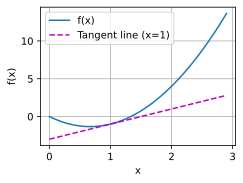

In [9]:
# np.arange(start, stop, step)，其中：

# start 是序列的起始值。
# stop 是序列结束的值，但不包括这个值（即最大值加1才是这个参数的值）。
# step 是序列中每个数值之间的间隔。
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 偏导数

**偏导数是多元函数的导数概念，用于衡量多变量函数沿着某个特定方向的变化率。**

到目前为止，我们只讨论了仅含一个变量的函数的微分。
在深度学习中，函数通常依赖于许多变量。
因此，我们需要将微分的思想推广到*多元函数*（multivariate function）上。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数。
$y$关于第$i$个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$，
我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，
并计算$y$关于$x_i$的导数。
对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

### 梯度

梯度是指向函数增长最快的方向的向量，其方向与函数增长速率最大的方向相同，而其大小则表示函数在该方向上增长的速率。

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度（gradient）向量。

设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。


假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

### 链式法则

在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} . \frac{du}{dx}$$

现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。
假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。
注意，$y$是$x_1, x_2， \ldots, x_n$的函数。
对于任意$i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

### 小结
- 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

- 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

- 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

- 链式法则可以用来微分复合函数。

### 练习

1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。
1. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
1. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？
1. 尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

练习4：

对于$u关于a$ 的偏导数，我们有：

$$\frac{\partial u}{\partial a} = \frac{\partial u}{\partial x}.\frac{\partial x}{\partial a} +  \frac{\partial u}{\partial y}.\frac{\partial y}{\partial a} + \frac{\partial u}{\partial z}.\frac{\partial z}{\partial a}$$


对于$u关于b$ 的偏导数，我们有：

$$\frac{\partial u}{\partial b} = \frac{\partial u}{\partial x}.\frac{\partial x}{\partial b} +  \frac{\partial u}{\partial y}.\frac{\partial y}{\partial b} + \frac{\partial u}{\partial z}.\frac{\partial z}{\partial b}$$

其中，$\frac{\partial u}{\partial x},\frac{\partial u}{\partial u},\frac{\partial u}{\partial z}$是$u$在$(x,y,z)$空间中的偏导数，而$\frac{\partial x}{\partial a},\frac{\partial y}{\partial a},\frac{\partial z}{\partial a},\frac{\partial x}{\partial b},\frac{\partial y}{\partial b},\frac{\partial z}{\partial b}$分别是$x，y,z$关于$a和b$的偏导数。




练习1：
- 对$y = f(x) = x^3 - \frac{1}{x}$ 得$f'(x)=2x^2+1/x^2$
- $y在x = 1$的斜率为$f'(1)=2+1=3$
- 切点$(1,f(1))=(1,0)$
- 在$x=1处的切线为(y-0)=3(x-1) =》 y=3x-3$

<ipython-input-7-2e926da71a34>:2: RuntimeWarning: divide by zero encountered in divide
  plot(x, [x**3-1/x, 3* x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


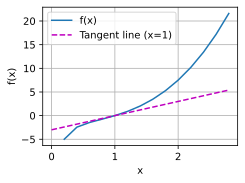

In [7]:
x = np.arange(0, 3, 0.2)
plot(x, [x**3-1/x, 3* x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

练习2

函数$f(\mathbf{x})=3x_1^2+5e^{x_2}$是一个多元函数，其中$\mathbf{x}$是一个向量，包含两个变量$x_1和x_2$。要求这个函数的梯度$\nabla f(\mathbf{x})$，我们需要分别对$x_1和x_2$求偏导数。

对于$x_1$的偏导数：
$$\frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1}(3x_1^2)=6x_1 $$

对于$x_2$的偏导数：

$$\frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2}(5e^{x_2})=5e^{x_2} $$

所以，函数$f(\mathbf{x})$的梯度向量$\nabla f(\mathbf{x})$为：
$$\nabla f(\mathbf{x})=(\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2})=(6x_1,5e^{x_2})$$

练习3：





## 自动微积分

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

### 一个简单的例子

**假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导**



In [8]:
import torch
# 首先，我们创建一个包含四个元素的张量，值从0开始，默认步长为1。
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [9]:
# 设置张量x的.requires_grad属性为True，意味着对x进行的操作将在计算图中被跟踪，从而允许之后计算其梯度。
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)

# 在这里调用x.grad实际上并没有显示任何内容，因为在这个点梯度还没有被计算出来，它默认是None。
# 通常在进行反向传播计算梯度之前查看梯度是没有意义的。
x.grad  # 默认值是None

In [10]:
# 计算x与其自身的点积（即所有元素相乘求和），然后将结果乘以2。
# torch.dot(x, x)相当于计算x[0]*x[0] + x[1]*x[1] + x[2]*x[2] + x[3]*x[3]
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [11]:
# 执行反向传播计算，计算输出y关于输入x的梯度。
# y是x各元素平方和的两），所以x的梯度应该是每个元素的两倍，因为对每个x[i]的偏导数是2*x[i]。
y.backward()
# 这次调用会显示计算出的梯度，即每个元素都是其值的两倍
# 因为我们计算的是y = 2*(x[0]^2 + x[1]^2 + x[2]^2 + x[3]^2)的梯度，所以对于x[i]，其梯度确实是4*x[i]。
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
# 用来验证计算出的梯度是否确实等于4 * x
x.grad == 4 * x

In [12]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播

当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

In [15]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
print(x)
print(y.sum())
print(torch.ones(len(x)))
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 1., 2., 3.], requires_grad=True)
tensor(14., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.])


tensor([0., 2., 4., 6.])

### 分离计算

有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

下面的反向传播函数计算$z=u*x$关于x的偏导数，同时将u作为常数处理， 而不是$z=x*x*x$关于x的偏导数。





In [20]:
x.grad.zero_()
print('x:',x)
y = x * x
print('y:',y)
u = y.detach()
print('u:',u)
z = u * x
print('z:',z)

z.sum().backward()
x.grad == u

x: tensor([0., 1., 2., 3.], requires_grad=True)
y: tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
u: tensor([0., 1., 4., 9.])
z: tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)


tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Python控制流的梯度计算

使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。

In [21]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [26]:
a = torch.randn(size=(), requires_grad=True)
print('a:',a)
d = f(a)
print('d:',d)
# 使用 d.backward() 执行反向传播，计算 d 相对于 a 的梯度。
# 由于 a 被设置为 requires_grad=True，PyTorch 将自动计算 d 相对于 a 的梯度，并将结果存储在 a.grad 属性中。
d.backward()
print('a:',a)

a: tensor(-0.7571, requires_grad=True)
d: tensor(-155060.5156, grad_fn=<MulBackward0>)
a: tensor(-0.7571, requires_grad=True)


In [25]:
a.grad == d / a

tensor(True)

### 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

## 概率

### 基本概率论

 如果骰子是公平的，那么所有六个结果$\{1, \ldots, 6\}$都有相同的可能发生， 因此我们可以说$1$发生的概率为$\frac{1}{6}$

。

In [33]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
print(fair_probs)
# multinomial.Multinomial是PyTorch中用于创建多项式分布的对象。两个参数分别是指实验次数和概率分布
# .sample()：调用这个方法是从之前定义的多项式分布中抽取样本。
# 如果实验次数设置为1，将返回一个长度为6的张量，其中一个位置的值为1，表示抽中的结果，其余位置为0。
print(multinomial.Multinomial(1, fair_probs).sample())
print(multinomial.Multinomial(10, fair_probs).sample())

# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值


tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
tensor([0., 0., 1., 0., 0., 0.])
tensor([0., 4., 1., 2., 3., 0.])


tensor([0.1600, 0.1630, 0.1760, 0.1700, 0.1640, 0.1670])

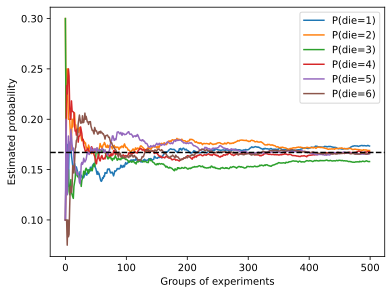

In [31]:
# 模拟500组实验，每组实验包含10次六面骰子的投掷，并记录每组实验中各个点数出现的频次。
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#### 概率论公理

*概率*（probability）可以被认为是将集合映射到真实值的函数。
在给定的样本空间$\mathcal{S}$中，事件$\mathcal{A}$的概率，
表示为$P(\mathcal{A})$，满足以下属性：

* 对于任意事件$\mathcal{A}$，其概率从不会是负数，即$P(\mathcal{A}) \geq 0$；
* 整个样本空间的概率为$1$，即$P(\mathcal{S}) = 1$；
* 对于*互斥*（mutually exclusive）事件（对于所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$）的任意一个可数序列$\mathcal{A}_1, \mathcal{A}_2, \ldots$，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

#### 随机变量
通过$P(X=a)$，我们区分了随机变量$X$和$X$可以采取的值（例如$a$）。我们可以简单用$P(a)$表示随机变量取值$a$的概率。

### 处理多个随机变量

#### 联合概率

给定任意值$a$和$b$，联合概率可以回答：$A=a$和$B=b$同时满足的概率是多少？
请注意，对于任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。

#### 条件概率

联合概率的不等式带给我们一个有趣的比率：
$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。
我们称这个比率为*条件概率*（conditional probability），
并用$P(B=b \mid A=a)$表示它：它是$B=b$的概率，前提是$A=a$已发生。

#### 贝叶斯定理

贝叶斯定理可以用以下公式表示:
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

其中：
- P(A \mid B) 是在事件 B 已经发生的情况下事件 A 发生的后验概率（或条件概率）
- $P(B \mid A) $ 是在事件 A 已经发生的情况下事件 B 发生的似然概率（或条件概率）。
- $P(A)$是事件 A 发生的先验概率（或边缘概率）
- $P(B)$  是事件 B 发生的边缘概率。

在实际应用中，这个过程通常包括以下步骤：

- 1.先验概率：开始时对假设A的概率有一个初步估计（先验）。
- 2.似然度：观察到一些证据B后，评估在A为真的情况下看到B的可能程度。
- 3.标准化：通过考虑B发生的总体概率来调整我们的估计，确保概率总和为1。
- 4.后验概率：综合先验知识和新证据，得到事件A在新证据B出现后的更新概率（后验）。

## 查阅文档

### 查找模块中的所有函数和类

为了知道模块中可以调用哪些函数和类，可以调用dir函数。

通常可以忽略以“__”（双下划线）开始和结束的函数，它们是Python中的特殊对象， 或以单个“_”（单下划线）开始的函数，它们通常是内部函数。

In [35]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'Transform

### 查找特定函数和类的用法

有关如何使用给定函数或类的更具体说明，可以调用help函数。

In [34]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us

在Jupyter记事本中，我们可以使用?指令在另一个浏览器窗口中显示文档。 例如，list?指令将创建与help(list)指令几乎相同的内容，并在新的浏览器窗口中显示它。

In [36]:
list?

In [37]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))